# Importamos librerias y datasets

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from scipy.stats import norm
from sklearn import preprocessing


In [3]:
diamonds_train    = pd.read_csv("data/train.csv")
diamonds_X_test   = pd.read_csv("data/test.csv")
diamonds_Y_sample = pd.read_csv("data/sample_submission.csv")

# Análisis exploratorio de los datos:

In [4]:
print(f"Dimensión de diamonds_train    = {diamonds_train.shape}")
print(f"Dimensión de diamonds_X_test   = {diamonds_X_test.shape}")
print(f"Dimensión de diamonds_Y_sample = {diamonds_Y_sample.shape}")

Dimensión de diamonds_train    = (40455, 11)
Dimensión de diamonds_X_test   = (13485, 10)
Dimensión de diamonds_Y_sample = (13485, 2)


In [5]:
diamonds_train.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.14,Ideal,G,VVS2,61.0,56.0,6.74,6.76,4.12,9013
1,1,0.76,Ideal,H,VS2,62.7,57.0,5.86,5.82,3.66,2692
2,2,0.84,Ideal,G,VS1,61.4,56.0,6.04,6.15,3.74,4372
3,3,1.55,Ideal,H,VS1,62.0,57.0,7.37,7.43,4.59,13665
4,4,0.30,Ideal,G,SI2,61.9,57.0,4.28,4.31,2.66,422


In [6]:
diamonds_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       40455 non-null  int64  
 1   carat    40455 non-null  float64
 2   cut      40455 non-null  object 
 3   color    40455 non-null  object 
 4   clarity  40455 non-null  object 
 5   depth    40455 non-null  float64
 6   table    40455 non-null  float64
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
 10  price    40455 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 3.4+ MB


In [7]:
diamonds_train.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [8]:
diamonds_train.duplicated().sum()

0

### Variables categóricas:

In [9]:
print(f"Variables categoricas encontradas: {list(diamonds_train.columns[diamonds_train.dtypes == 'object'])}")
diamonds_train[[ c for c in diamonds_train.columns if diamonds_train[c].dtype == "object" ]].describe().T

Variables categoricas encontradas: ['cut', 'color', 'clarity']


,count,unique,top,freq
cut,40455,5,Ideal,16193
color,40455,7,G,8459
clarity,40455,8,SI1,9746


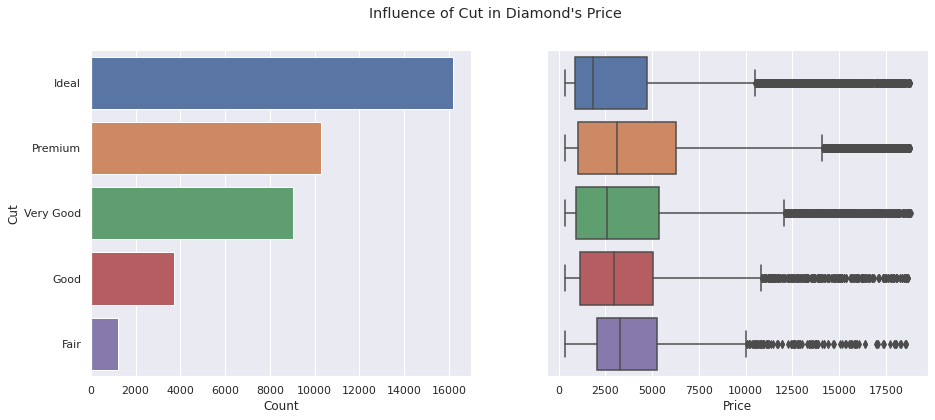

In [10]:
fig,ax = plt.subplots(1,2,figsize=(15,6) , sharey=True)
plt.suptitle("Influence of Cut in Diamond's Price")

ax[0] = plt.subplot(1, 2, 1)
sns.countplot( y = 'cut', data = diamonds_train, order=['Ideal','Premium','Very Good','Good','Fair'])
plt.xlabel("Count")
plt.ylabel("Cut")

ax[1] = plt.subplot(1, 2, 2)
sns.boxplot(x=diamonds_train.price,y=diamonds_train.cut,order=['Ideal','Premium','Very Good','Good','Fair'])
plt.xlabel("Price")
plt.ylabel("")

plt.show()

In [11]:
diamonds_train.cut.value_counts()

Ideal        16193
Premium      10301
Very Good     9030
Good          3710
Fair          1221
Name: cut, dtype: int64

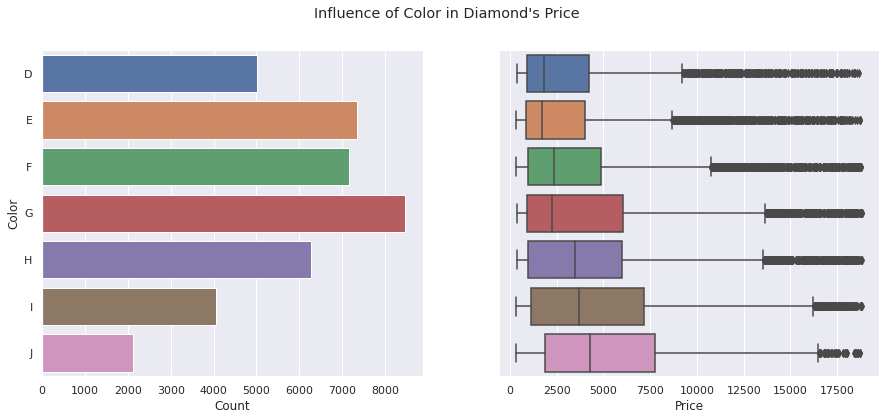

In [12]:
fig,ax = plt.subplots(1,2,figsize=(15,6) , sharey=True)
plt.suptitle("Influence of Color in Diamond's Price")

ax[0] = plt.subplot(1, 2, 1)
sns.countplot( y = 'color', data = diamonds_train, orient='v',order=['D','E','F','G','H','I','J'])
plt.xlabel("Count")
plt.ylabel("Color")

ax[1] = plt.subplot(1, 2, 2)
sns.boxplot(x=diamonds_train.price,y=diamonds_train.color,order=['D','E','F','G','H','I','J'])
plt.xlabel("Price")
plt.ylabel("")

plt.show()

In [13]:
diamonds_train.color.value_counts()

G    8459
E    7346
F    7174
H    6273
D    5019
I    4065
J    2119
Name: color, dtype: int64

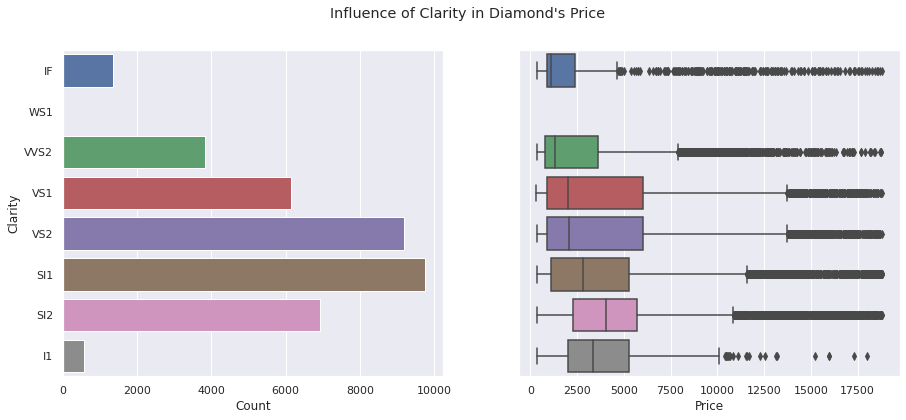

In [14]:
fig,ax = plt.subplots(1,2,figsize=(15,6) , sharey=True)
plt.suptitle("Influence of Clarity in Diamond's Price")

ax[0] = plt.subplot(1, 2, 1)
sns.countplot( y = 'clarity', data = diamonds_train, orient='v',order=['IF','WS1','VVS2','VS1','VS2','SI1','SI2','I1'])
plt.xlabel("Count")
plt.ylabel("Clarity")

ax[1] = plt.subplot(1, 2, 2)
sns.boxplot(x=diamonds_train.price,y=diamonds_train.clarity,order=['IF','WS1','VVS2','VS1','VS2','SI1','SI2','I1'])
plt.xlabel("Price")
plt.ylabel("")


plt.show()

In [15]:
diamonds_train.clarity.value_counts()

SI1     9746
VS2     9175
SI2     6912
VS1     6137
VVS2    3822
VVS1    2732
IF      1367
I1       564
Name: clarity, dtype: int64

En los gráficos se ven muchos outliers. Vamos a contarlos.

### Variables numéricas:

In [16]:
print(f"Variables numéricas encontradas: {list(diamonds_train.columns[diamonds_train.dtypes != 'object'])}")
diamonds_train.describe().T

Variables numéricas encontradas: ['id', 'carat', 'depth', 'table', 'x', 'y', 'z', 'price']


,count,mean,std,min,25%,50%,75%,max
id,40455.0,20227.000000,11678.496907,0.0,10113.50,20227.00,30340.50,40454.00
carat,40455.0,0.798406,0.473424,0.2,0.40,0.70,1.04,5.01
depth,40455.0,61.744793,1.430860,43.0,61.00,61.80,62.50,79.00
table,40455.0,57.450157,2.235814,43.0,56.00,57.00,59.00,95.00
x,40455.0,5.733269,1.120257,0.0,4.71,5.70,6.54,10.74
y,40455.0,5.736107,1.119260,0.0,4.72,5.71,6.54,31.80
z,40455.0,3.539249,0.693619,0.0,2.91,3.53,4.04,6.98
price,40455.0,3939.026968,3995.017122,327.0,949.00,2404.00,5331.00,18818.00


In [17]:
diamonds_train.shape

(40455, 11)

Vemos que en x, y y z hay valores mínimos de 0, lo cual no tiene sentido al ser dimensiones. Los quitamos pasandolos primeros a nulos y luego haciendo un dropna.

In [18]:
diamonds_train.loc[diamonds_train['x']==0, 'x'] = None
diamonds_train.loc[diamonds_train['y']==0, 'y'] = None
diamonds_train.loc[diamonds_train['z']==0, 'z'] = None

In [19]:
diamonds_train.isna().sum()

id          0
carat       0
cut         0
color       0
clarity     0
depth       0
table       0
x           3
y           2
z          12
price       0
dtype: int64

In [20]:
diamonds_train.dropna(axis=0, how='any', inplace=True)
diamonds_train.shape

(40443, 11)

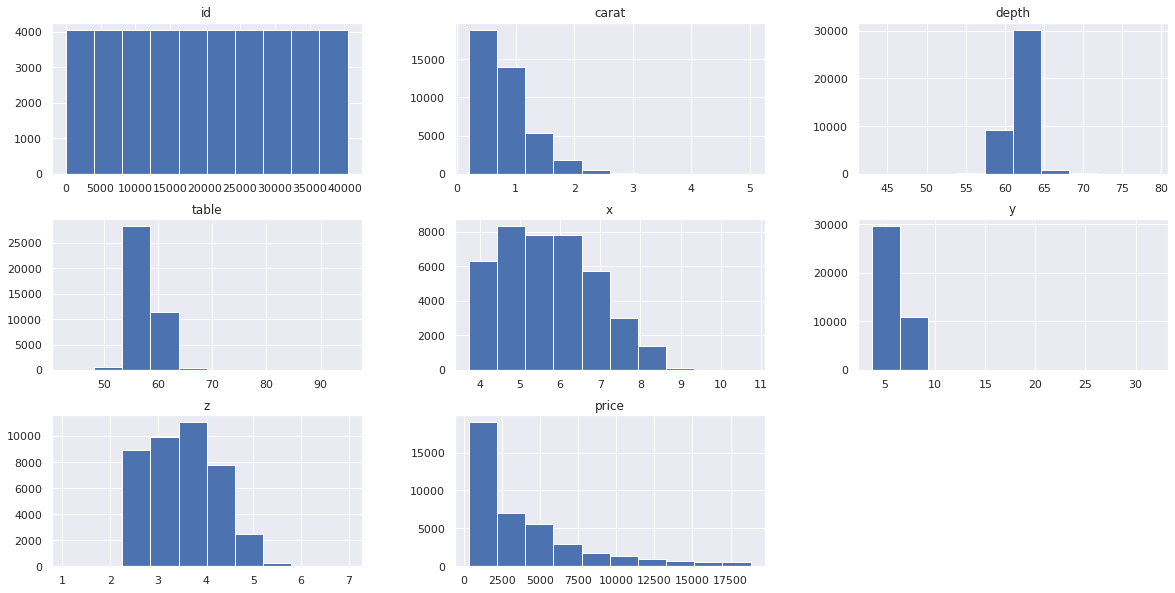

In [21]:
diamonds_train.hist(figsize=(20,10));

Vemos que hay colas hacia la derecha en carat, en table y en y. Quitamos los outliers por debajo de quantil 1 y por encima del quantil 99.

In [22]:
def rangos_percentiles(columna, percentil_inferior, percentil_superior):
    # Funcion que devuelve la posicion de los percentiles inferiores y superiores indicados.
    limite_inferior = np.percentile(columna , percentil_inferior)
    limite_superior = np.percentile(columna , percentil_superior)    
    return limite_inferior , limite_superior

In [23]:
percentiles = {'carat'    : ( 1  , 99 ) , 
               'table'    : ( 1  , 99 ) , 
               'y'        : ( 1  , 99 ) , 
               'z'        : ( 0.25 , 99.75 ) }
for var,val in percentiles.items() :
    lim_lower,lim_upper = rangos_percentiles(diamonds_train[var],val[0],val[1])
    diamonds_train.loc[diamonds_train[var] <= lim_lower, var] = None
    diamonds_train.loc[diamonds_train[var] >= lim_upper, var] = None
diamonds_train.isna().sum()

id           0
carat      829
cut          0
color        0
clarity      0
depth        0
table      934
x            0
y          822
z          226
price        0
dtype: int64

In [24]:
diamonds_train.dropna(axis=0, how='any', inplace=True)
diamonds_train.shape

(38583, 11)

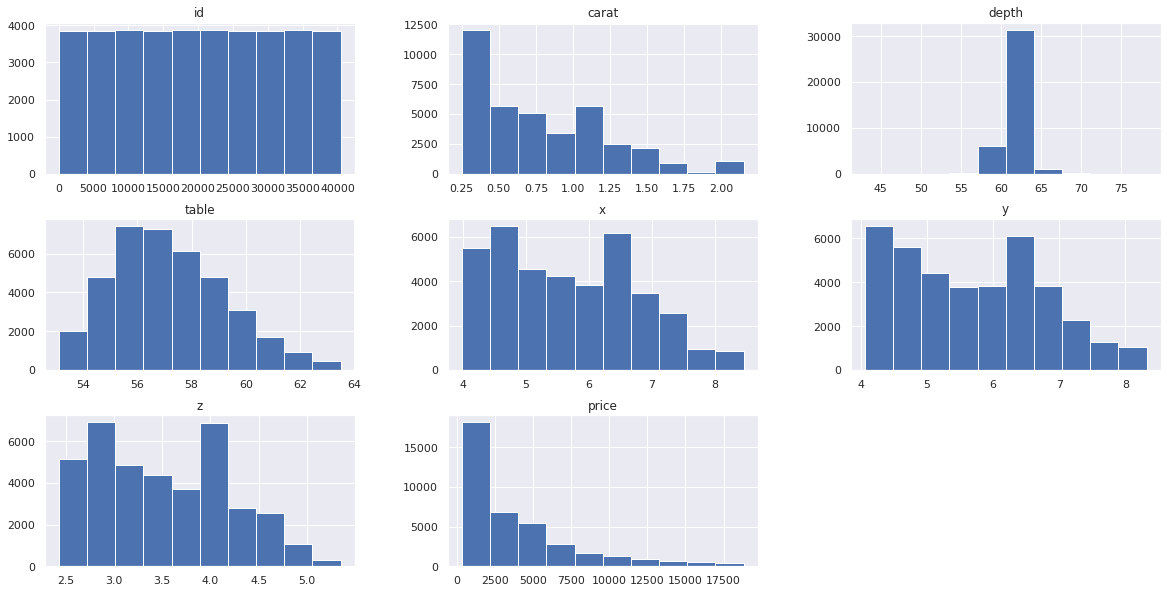

In [25]:
diamonds_train.hist(figsize=(20,10));

In [26]:
diamonds_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,38583.0,20226.692818,11666.861044,0.00,10125.50,20224.00,30331.50,40453.00
carat,38583.0,0.785867,0.441533,0.25,0.40,0.70,1.04,2.15
depth,38583.0,61.759189,1.388063,43.00,61.10,61.80,62.50,78.20
table,38583.0,57.408302,2.024152,53.10,56.00,57.00,59.00,63.50
x,38583.0,5.719185,1.071829,3.98,4.72,5.70,6.53,8.46
y,38583.0,5.721866,1.065088,4.06,4.73,5.71,6.53,8.32
z,38583.0,3.532893,0.662879,2.43,2.92,3.53,4.03,5.35
price,38583.0,3847.796776,3818.458780,335.00,965.00,2407.00,5254.50,18818.00


/home/danihelguera/anaconda3_linux/envs/ironhack/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


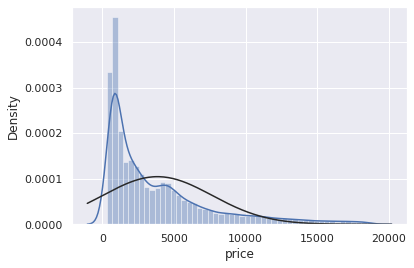

<Figure size 432x288 with 0 Axes>

In [27]:
sns.distplot(diamonds_train['price'], fit=norm);
fig = plt.figure()

La curva de los precios tiene un sesgo my marcado hacia la izquierda de la gráfica con un pico cercano al 0.


In [27]:
print("Skewness: %f" % diamonds_train['price'].skew())
print("Kurtosis: %f" % diamonds_train['price'].kurt())

Skewness: 1.559244
Kurtosis: 2.234109


Con un sesgo por debajo de 1.6 y una curtosis bastante alta de 2.2, se corresponde mejor a una función logaritmica. 
Por tanto, hacemos una transformación logarítmica.

/home/danihelguera/anaconda3_linux/envs/ironhack/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


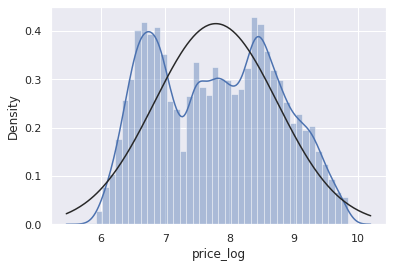

<Figure size 432x288 with 0 Axes>

In [28]:
diamonds_train["price_log"] = np.log(diamonds_train['price'])
sns.distplot(diamonds_train["price_log"], fit=norm);
fig = plt.figure()

Aunque siguen existiendo picos prominentes, la transformacion logartimica del precio si se puede ajustar a una curva normal. 

### Analizamos la Multicolinearidad de las variables numéricas antes de transformar las categóricas.

Text(0.5, 1.0, 'PEARSON CORRELATION MATRIX')

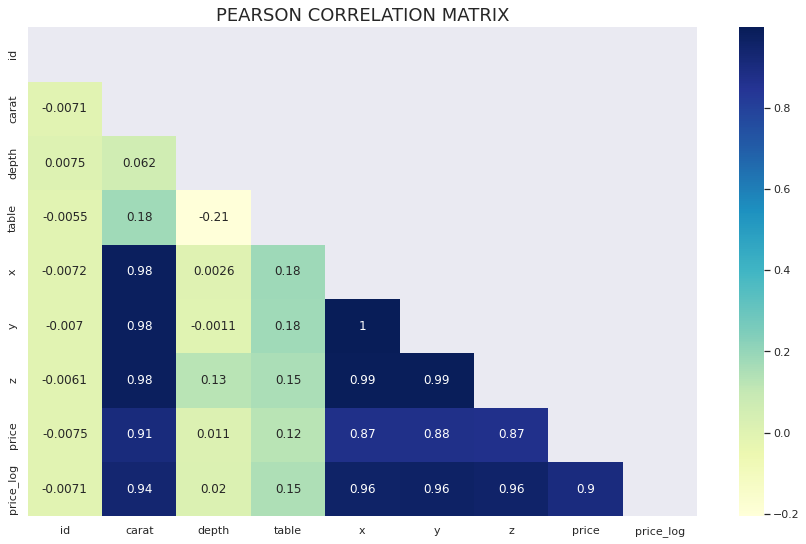

In [29]:
corr = diamonds_train.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(corr, mask=mask , annot=True, ax=ax, cmap="YlGnBu")
plt.title('PEARSON CORRELATION MATRIX', fontsize=18)

Vemos que la transformada logaritmica del precio tiene muy altas relaciones con x, y, z y con carat.
Sorprendentemente los campos depth y table no muestras ninguna correlación con ninguna otra variable.

Se puede usar la Feature Selection para ver si es importante mantener todas o podemos eliminar alguna o todas de x,y o z.

De momento vamos a verlo graficamente:

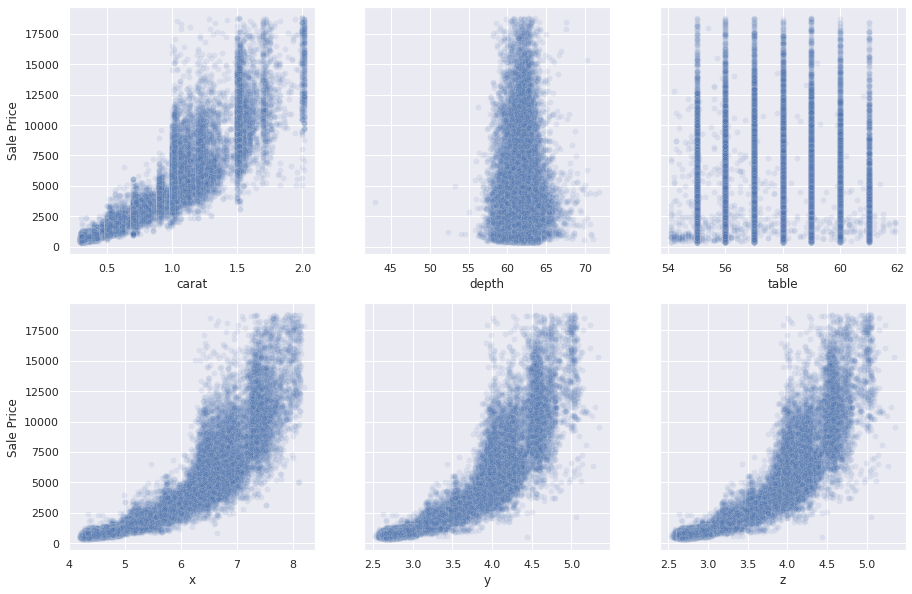

In [30]:
fig, ax = plt.subplots(2, 3, figsize=(15,10), sharey=True)

ax[0,0] = plt.subplot(2, 3, 1)
sns.scatterplot(x="carat", y="price", data=diamonds_train , alpha=.1)
plt.xlabel('carat')
plt.ylabel('Sale Price')

ax[0,1] = plt.subplot(2, 3, 2)
sns.scatterplot(x="depth", y="price", data=diamonds_train , alpha=.1)
plt.xlabel('depth')
plt.ylabel('Sale Price')

ax[0,2] = plt.subplot(2, 3, 3)
sns.scatterplot(x="table", y="price", data=diamonds_train , alpha=.1)
plt.xlabel('table')
plt.ylabel('Sale Price')

ax[1,0] = plt.subplot(2, 3, 4)
sns.scatterplot(x="x", y="price", data=diamonds_train , alpha=.1)
plt.xlabel('x')
plt.ylabel('Sale Price')

ax[1,1] = plt.subplot(2, 3, 5)
sns.scatterplot(x="z", y="price", data=diamonds_train , alpha=.1)
plt.xlabel('y')
plt.ylabel('Sale Price')

ax[1,2] = plt.subplot(2, 3, 6)
sns.scatterplot(x="z", y="price", data=diamonds_train , alpha=.1)
plt.xlabel('z')
plt.ylabel('Sale Price')

plt.show()

Hay 4 graficas donde se puede observar una regresión cuadrática (polinomio de grado 2)

Hacemos las mismas gráficas pero usando la transformada logarítmica del precio:

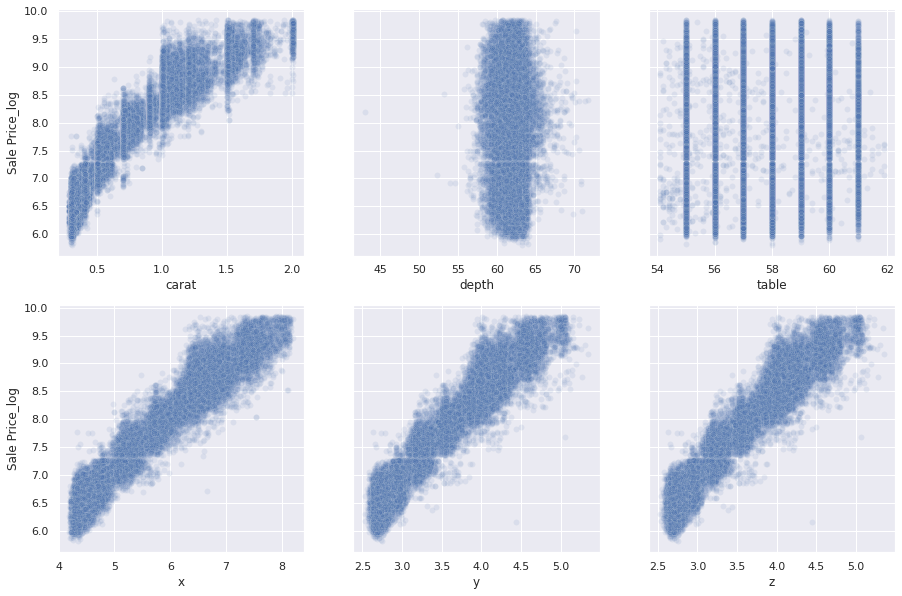

In [31]:
fig, ax = plt.subplots(2, 3, figsize=(15,10), sharey=True)

ax[0,0] = plt.subplot(2, 3, 1)
sns.scatterplot(x="carat", y="price_log", data=diamonds_train , alpha=.1)
plt.xlabel('carat')
plt.ylabel('Sale Price_log')

ax[0,1] = plt.subplot(2, 3, 2)
sns.scatterplot(x="depth", y="price_log", data=diamonds_train , alpha=.1)
plt.xlabel('depth')
plt.ylabel('Sale Price_log')

ax[0,2] = plt.subplot(2, 3, 3)
sns.scatterplot(x="table", y="price_log", data=diamonds_train , alpha=.1)
plt.xlabel('table')
plt.ylabel('Sale Price_log')

ax[1,0] = plt.subplot(2, 3, 4)
sns.scatterplot(x="x", y="price_log", data=diamonds_train , alpha=.1)
plt.xlabel('x')
plt.ylabel('Sale Price_log')

ax[1,1] = plt.subplot(2, 3, 5)
sns.scatterplot(x="z", y="price_log", data=diamonds_train , alpha=.1)
plt.xlabel('y')
plt.ylabel('Sale Price_log')

ax[1,2] = plt.subplot(2, 3, 6)
sns.scatterplot(x="z", y="price_log", data=diamonds_train , alpha=.1)
plt.xlabel('z')
plt.ylabel('Sale Price_log')

plt.show()

Es muy posible que podamos indicar una regresión lineal entre la transformada logarítmica del precio y los predictores.

In [32]:
diamonds_train.drop(columns="price_log")

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.14,Ideal,G,VVS2,61.0,56.0,6.74,6.76,4.12,9013
1,1,0.76,Ideal,H,VS2,62.7,57.0,5.86,5.82,3.66,2692
2,2,0.84,Ideal,G,VS1,61.4,56.0,6.04,6.15,3.74,4372
3,3,1.55,Ideal,H,VS1,62.0,57.0,7.37,7.43,4.59,13665
4,4,0.30,Ideal,G,SI2,61.9,57.0,4.28,4.31,2.66,422
...,...,...,...,...,...,...,...,...,...,...,...
40446,40446,1.19,Ideal,D,SI2,60.4,55.0,6.89,6.91,4.17,5406
40447,40447,0.53,Ideal,E,SI2,60.8,57.0,5.23,5.26,3.19,1229
40450,40450,0.40,Ideal,E,VVS1,60.8,57.0,4.79,4.82,2.92,1278
40451,40451,0.52,Ideal,J,SI2,61.6,55.0,5.16,5.19,3.19,924


### Exportamos los dataframe limpio.

In [33]:
diamonds_train.drop(columns="price_log",inplace=True)
diamonds_train.to_csv(  'data/train_cleaned.csv' , index = False)

### Categorical Encoding

In [34]:
print("Exportamos los dataframes despues de hacer Label Encoding")
le = preprocessing.LabelEncoder()
df = diamonds_train.copy()
df["cut"]       = le.fit_transform(df["cut"])
df["color"]     = le.fit_transform(df["color"])
df["clarity"]   = le.fit_transform(df["clarity"])
df.to_csv(  'data/train_cleaned_LabelEncoding.csv' , index = False)

df = diamonds_X_test.copy()
df["cut"]       = le.fit_transform(df["cut"])
df["color"]     = le.fit_transform(df["color"])
df["clarity"]   = le.fit_transform(df["clarity"])
df.to_csv(  'data/test_cleaned_LabelEncoding.csv' , index = False)

Exportamos los dataframes despues de hacer Label Encoding


In [35]:
print("Exportamos los dataframes despues de hacer Manual Encoding")
dic_para_cut = {'Ideal'     : 5 , 
                'Premium'   : 4 , 
                'Very Good' : 3 , 
                'Good'      : 2 ,
                'Fair'      : 1 }
dic_para_color = {'D' : 7 ,
                  'E' : 6 ,
                  'F' : 5 ,
                  'G' : 4 ,
                  'H' : 3 ,
                  'I' : 2 ,
                  'J' : 1 }
dic_para_clarity = {'IF'   : 8 ,
                    'WS1'  : 7 ,
                    'VVS2' : 6 ,
                    'VS1'  : 5 ,
                    'VS2'  : 4 ,
                    'SI1'  : 3 ,
                    'SI2'  : 2 ,
                    'I1'   : 1 } 
df = diamonds_train.copy()
df.cut      = df.cut.map(dic_para_cut)
df.color    = df.color.map(dic_para_color)
df.clarity  = df.clarity.map(dic_para_clarity)
df.to_csv(  'data/train_cleaned_ManualEncoding.csv' , index = False)

df = diamonds_X_test.copy()
df.cut      = df.cut.map(dic_para_cut)
df.color    = df.color.map(dic_para_color)
df.clarity  = df.clarity.map(dic_para_clarity)
df.to_csv(  'data/test_cleaned_ManualEncoding.csv' , index = False)

Exportamos los dataframes despues de hacer Manual Encoding


In [36]:
print("Exportamos los dataframes despues de hacer Get Dummies Encoding")
df   = pd.get_dummies( data=diamonds_train  , columns=['cut','color','clarity'] )
df.to_csv(  'data/train_cleaned_GetDummiesEncoding.csv' , index = False)

df   = pd.get_dummies( data=diamonds_X_test , columns=['cut','color','clarity'] )
df.to_csv(  'data/test_cleaned_GetDummiesEncoding.csv' , index = False)

Exportamos los dataframes despues de hacer Get Dummies Encoding


In [40]:
def onehotencodificar(df) :
    for c in list(df.columns[df.dtypes == 'object']):
        onehotencoder = preprocessing.OneHotEncoder()
        labels = [str(c)+ "_" + str(a) for a in list(df[c].unique())]
        ohe = onehotencoder.fit_transform(df[c].values.reshape(-1,1)).toarray()
        df[labels] = pd.DataFrame(ohe, index=df.index)
        df.drop(columns=c,inplace=True)

print("Exportamos los dataframes despues de hacer OneHotEncoding")
df = diamonds_train.copy()
onehotencodificar(df)
df.to_csv(  'data/train_cleaned_OneHotEncooding.csv' , index = False)

df = diamonds_X_test.copy()
onehotencodificar(df)
df.to_csv(  'data/test_cleaned_OneHotEncoding.csv' , index = False)

Exportamos los dataframes despues de hacer OneHotEncoding
